In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report ,confusion_matrix


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
#augmentation later

In [5]:
import cv2

# Load image
img = cv2.imread("/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (1).jpg")

# Get image dimensions
height, width, channels = img.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")


Width: 512, Height: 512, Channels: 3


 In the cell **below** i tried to implement **Data Augmentation** to increase the input data but it did not work as the data was highly sensitive and any kind of Variation in images disrupt it.

In [6]:
# batch_size = 32
# train_datagen = ImageDataGenerator(
#     rescale=1./255,           # Normalize pixel values between 0 and 1
#     # width_shift_range=0.1,    # Shift image horizontally by 20% of width
#     # height_shift_range=0.1,   # Shift image vertically by 20% of height
#     # shear_range=0.1,          # Apply shearing transformations
#     # zoom_range=0.1,           # Randomly zoom in/out by 20%
#     brightness_range=[0.8, 1.2]  # Adjust brightness (darker or brighter)
# )
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         '/kaggle/input/brain-tumor-classification-mri/Training',
#         target_size=(512, 512),
#         batch_size=batch_size,
#         class_mode='categorical')
# validation_generator = test_datagen.flow_from_directory(
#         '/kaggle/input/brain-tumor-classification-mri/Testing',
#         target_size=(512, 512),
#         batch_size=batch_size,
#         class_mode='categorical')

# train_ds = keras.utils.image_dataset_from_directory(
#     directory='/kaggle/input/brain-tumor-classification-mri/Training',
#     labels="inferred",  # Automatically assigns labels based on folder names
#     label_mode="categorical",   # Integer labels (0, 1, 2, 3 for 4 classes)
#     batch_size=32,
#     image_size=(512, 512)  # Resize all images to 256x256
# )

# # Load validation dataset
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory='/kaggle/input/brain-tumor-classification-mri/Testing',
#     labels="inferred",
#     label_mode="categorical",
#     batch_size=32,
#     image_size=(512, 512)
# )

In [7]:
# def process(image,label):
#     image = tensorflow.cast(image/255. ,tensorflow.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [8]:
# new method
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Prepared 2 list of X and y for data input and then converted them into numpy array

In [9]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)


In [11]:
X_train.shape

(2937, 224, 224, 3)

In [12]:
y_train.shape

(2937,)

As the data is classified into four sections , we need to shuffle them in order to proportionate the distribution

In [13]:
X_train,y_train = shuffle(X_train,y_train,random_state=1)


Performed **One Hot Encoding** on the labels after converted them into numerical values

In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Transfer Learning
Transfer learning is implemented by using the convolutional base of a pre-trained VGG16 model to extract features from images, while replacing its original classification layers with new ones tailored to your specific task. Only the new layers are trained, allowing the model to adapt quickly using the already learned features.

here in my model i have used **VGG16** and the include_top parameter is set to False so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [15]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

here i ****tried to train last 3 CNN layers**** of VGG16 also but that didn't improve the accuracy so removed later 

In [17]:
# conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False


conv_base.trainable = False


# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)
# conv_base.trainable = True  # Unfreeze all first
# for layer in conv_base.layers[:-3]:  # Freeze everything except last 3 layers
#     layer.trainable = False

In [18]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Added **Dense Layers** in decreasing order of neurons with **Dropout layers** to overcome **Overfitting **

(commentout are the layers i tried implementing and the best accuracy came out with the present used ones)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

model = Sequential()

model.add(conv_base)  

model.add(GlobalAveragePooling2D()) 
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))


# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.13))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,043,524 (57.39 MB)

 Trainable params: 328,836 (1.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

A **callback** is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training.

In this notebook, I have used **TensorBoard, ModelCheckpoint and ReduceLROnPlateau** callback functions

In [46]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard , ModelCheckpoint ,ReduceLROnPlateau
callbacks = [
    TensorBoard(log_dir="./logs", histogram_freq=1),
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=2, min_lr=1e-7)
]

history = model.fit(X_train,y_train,epochs=25,validation_split=0.1, callbacks=callbacks)

Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.5121 - loss: 2.2087 - val_accuracy: 0.8061 - val_loss: 0.4981 - learning_rate: 0.0010
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.7803 - loss: 0.5471 - val_accuracy: 0.8163 - val_loss: 0.4929 - learning_rate: 0.0010
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.8235 - loss: 0.4555 - val_accuracy: 0.8946 - val_loss: 0.3276 - learning_rate: 0.0010
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.8493 - loss: 0.3769 - val_accuracy: 0.8707 - val_loss: 0.3951 - learning_rate: 0.0010
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.8813 - loss: 0.3174 - val_accuracy: 0.8980 - val_loss: 0.3148 - learning_rate: 0.0010
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.8945 - loss: 0.2708 - val_accuracy: 0.9116 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.9152 - loss: 0.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

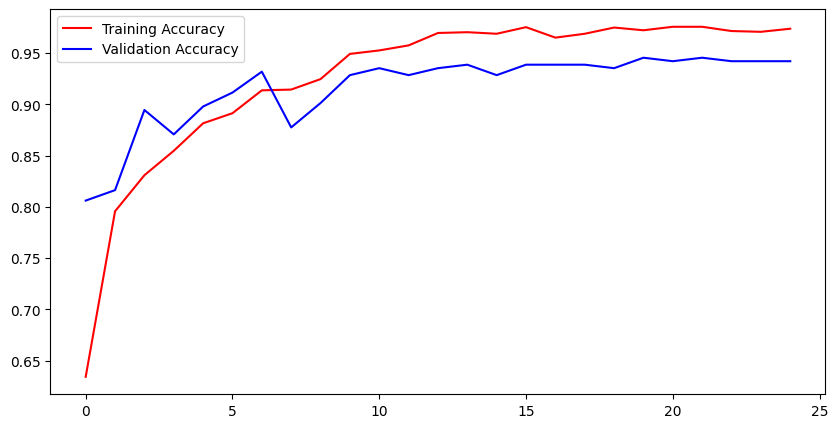

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

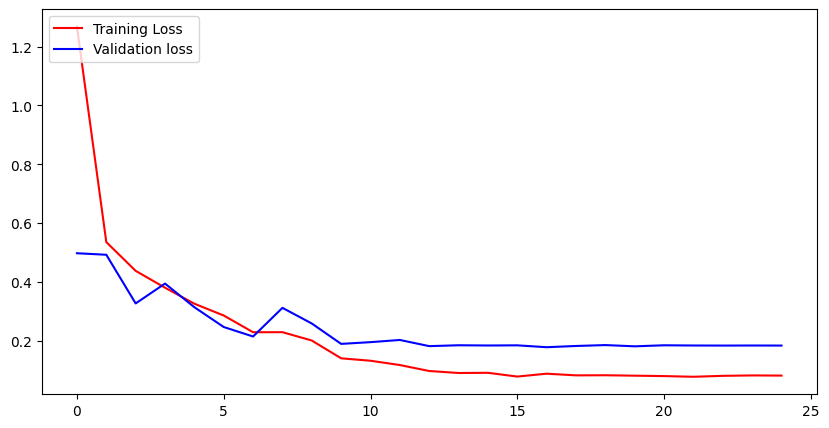

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [50]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 727ms/step


In [51]:
print(classification_report(y_test_new,pred))


              precision    recall  f1-score   support

           0       0.93      0.89      0.91        97
           1       0.92      0.92      0.92       100
           2       0.94      0.94      0.94        49
           3       0.94      1.00      0.97        81

    accuracy                           0.93       327
   macro avg       0.93      0.94      0.93       327
weighted avg       0.93      0.93      0.93       327



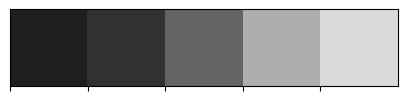

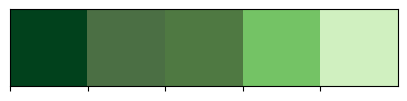

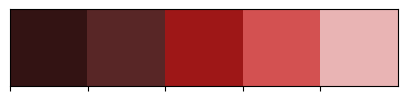

In [52]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

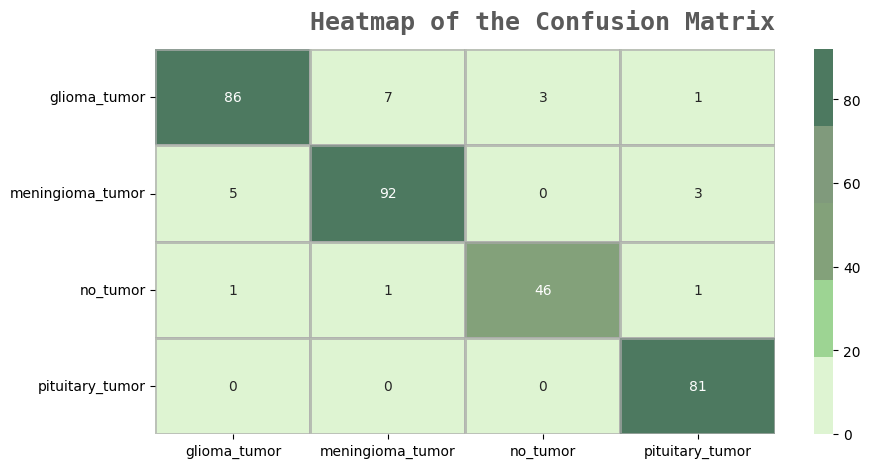

In [53]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

From the  **classification_report** and **confusion matrix** we can find that **F1 score of Glioma tumor and Meningioma** tumar is low from rest that is because the tumor images of both of these looks similar and thus model is keeping hard to classify between these two.

Good part of this model is that it classifies between tumar and non tumar with a high accuracy and F1 score !

In [54]:
# model.save('brain_tumor_classifier.keras')